In [7]:
import numpy as np
import scipy as sp
import scipy.stats as st
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib as mp
mp.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
# force inline plots
# %matplotlib inline
plt.style.use('seaborn-deep')
import torch.nn as nn
import copy
import pandas as pd
import sys
import os
import utils
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set a seed to ensure reproducibility
# seed = 128
# rnd  = np.random.RandomState(seed)
def DR(s, theta):
    return sp.special.gammainc(s, theta)

def DL(s, theta):
    return 1 - sp.special.gammainc(s+1, theta)
from IPython.display import Image, display
# algorithm2 = Image('src/images/Algorithm2.jpg')
# display(algorithm2)

matplotlib configurations

In [2]:
def use_svg_display(): 
    """Use the svg format to display a plot in Jupyter for sharper images!"""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):  
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

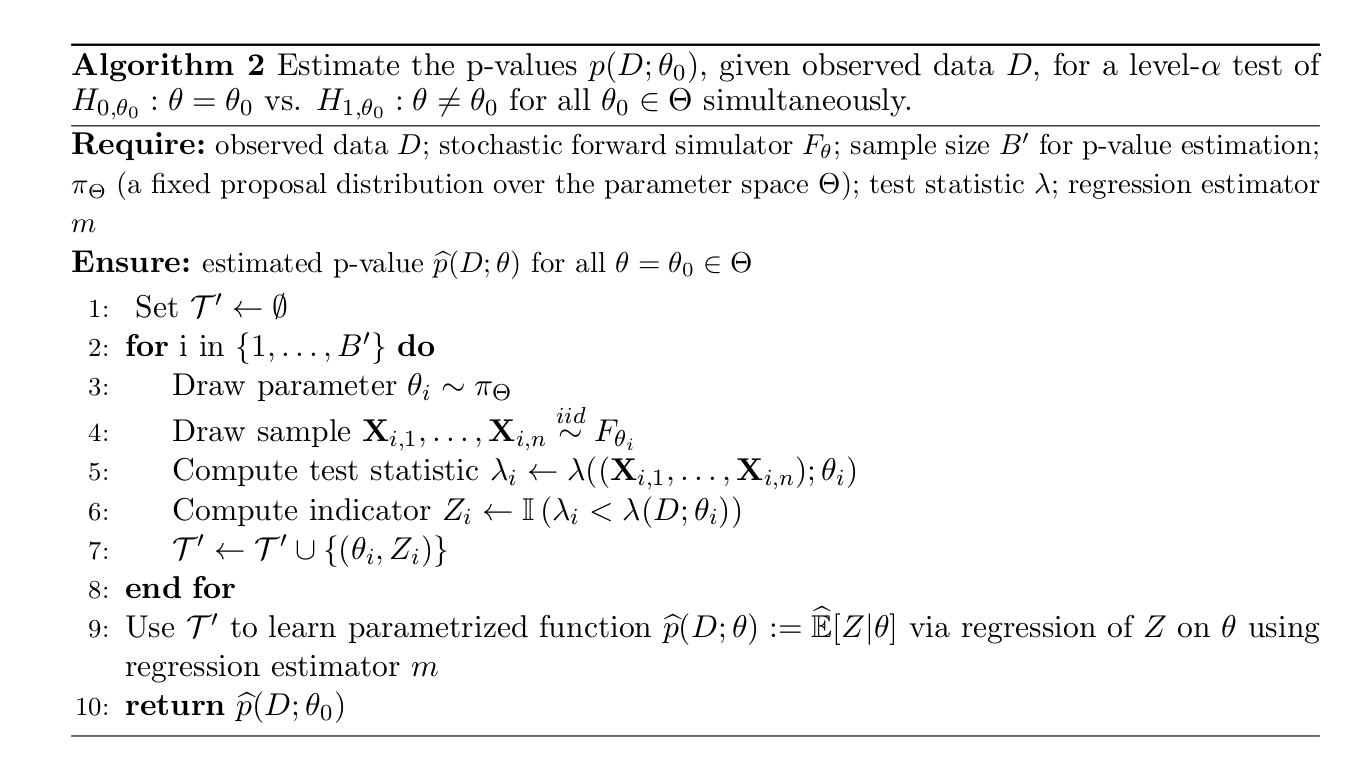

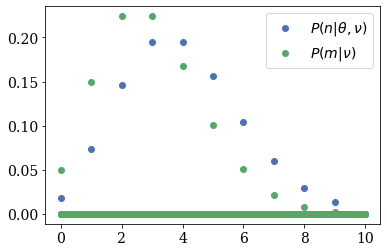

(2, 1)
(3, 0)
(2, 3)
(2, 1)
(1, 3)
(1, 2)


<Figure size 720x432 with 0 Axes>

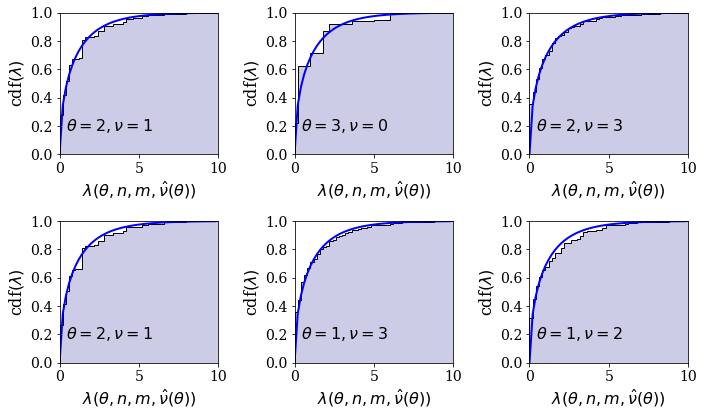

n= [ 3  3 14 ...  7  5  9]
m= [0 3 7 ... 9 3 3]
N= [7 4 0 ... 2 6 0]
M= [0 1 9 ... 3 3 3]
lambda_gen=  [2.79389712e-01 1.56184998e+00 1.30629636e-01 ... 5.96573537e-01
 1.26921402e-02 2.28996682e-04]
lambda_D=  [5.35376513e+00 1.14667667e-02 2.98227058e+01 ... 8.51603317e-01
 5.21436438e-02 1.62638018e+01]
   Z     theta        nu  N  M
0  1  2.175148  0.642475  7  0
1  0  3.241829  0.527842  4  1
2  1  8.673028  8.118541  0  9
3  1  1.259672  4.790658  1  5
4  1  6.252641  1.626389  4  7


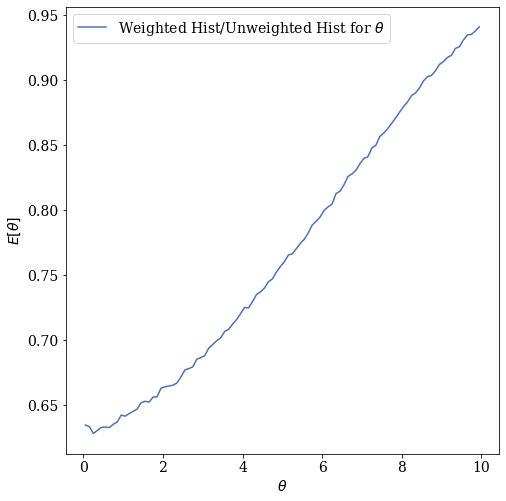

train set size:        9803920
validation set size:    98040
test set size:          98040
Model(
  (layer0): Linear(in_features=4, out_features=20, bias=True)
  (layer1): Linear(in_features=20, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=20, bias=True)
  (layer5): Linear(in_features=20, out_features=20, bias=True)
  (layer6): Linear(in_features=20, out_features=20, bias=True)
  (layer7): Linear(in_features=20, out_features=20, bias=True)
  (layer8): Linear(in_features=20, out_features=20, bias=True)
  (layer9): Linear(in_features=20, out_features=20, bias=True)
  (layer10): Linear(in_features=20, out_features=20, bias=True)
  (layer11): Linear(in_features=20, out_features=20, bias=True)
  (layer12): Linear(in_features=20, out_features=20, bias=True)
  (layer13): Linear(in_features=20, out_features=20, bias=True)
  (layer14): Line

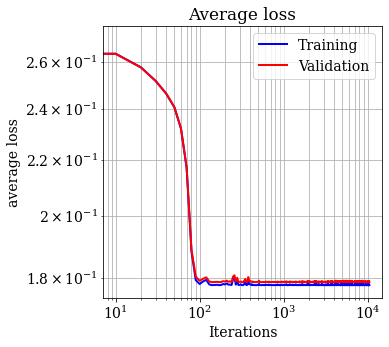

torch.Size([10000000])


In [30]:
%run GenerateData_and_Train_2_parameters_step_1.ipynb

In [3]:
# datafile = pd.read_csv('data/results/INFERENCE_DF_TWOPARAMS_1M.csv')
# data=datafile[['Z', 'theta', 'nu', 'N', 'M', 'phat']]
# data.head()

In [3]:
model = torch.load('TWO_PARAMETERS_TRAINED _MODEL.pth'); model.parameters

<bound method Module.parameters of RegressionModel(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout(p=0.3, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): BatchNorm1d(128, eps

In [4]:
model

RegressionModel(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout(p=0.3, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, 

In [24]:
#print all model parameters and layers
print([(name, param.shape) for name, param in model.named_parameters()])

[('layer0.weight', torch.Size([20, 4])), ('layer0.bias', torch.Size([20])), ('layer1.weight', torch.Size([20, 20])), ('layer1.bias', torch.Size([20])), ('layer2.weight', torch.Size([20, 20])), ('layer2.bias', torch.Size([20])), ('layer3.weight', torch.Size([20, 20])), ('layer3.bias', torch.Size([20])), ('layer4.weight', torch.Size([20, 20])), ('layer4.bias', torch.Size([20])), ('layer5.weight', torch.Size([1, 20])), ('layer5.bias', torch.Size([1]))]


### Recall that the goal is to approximate $\lambda$ by estimating the distribution $P(\lambda_{\text{gen}}<\lambda_D)$. 

We start off by using $\hat{\theta}_{MLE}$ since we have an analytical expression for the CDF of $\lambda$ in that case. 


$\hat{p}(\theta,\nu,N,M)$

In [25]:
# Bprime=10000
# N, M = 1, 2

# def plot_one(p_lambda_gen_lt_lambda_D, PHAT, theta, nu, ax):
#     ftsize = 20
#     xmin, xmax= 0, 1.2
#     ymin, ymax = 0, 100
#     x_range = (xmin, xmax)
#     y_range = (ymin, ymax)
#     ax.set_xlim(x_range)
#     ax.set_ylim(y_range)
#     ax.set_xlabel(r'$P(\lambda_{gen}<\lambda_D)$',fontsize=ftsize)
#     ax.hist(p_lambda_gen_lt_lambda_D, bins=5*xmax, range=x_range, density=True,
#             alpha=0.4, histtype='stepfilled', edgecolor='black', label=r'$P(\lambda_{gen}<\lambda_D)$ Exact')
#     ax.hist(PHAT, bins=5*xmax, range=x_range, density=True,
#             alpha=0.4, histtype='stepfilled', edgecolor='black',label=r'$\hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)$ ')
    
    
#     #positions for text
#     xwid = (xmax-xmin)/12
#     ywid = (ymax-ymin)/12
#     xpos = xmin + xwid*2
#     ypos = ymin + ywid*6
#     ax.text(xpos, ypos,
#     r'$ \theta = %d, \nu = %d$' % (theta, nu),
#     fontsize=ftsize)
    
#     ax.legend()
    
# theta, nu= 3, 2
# thetaMin, thetaMax = 0,10
# # theta = st.uniform.rvs(thetaMin, thetaMax, size=Bprime)

# n = st.poisson.rvs(theta+ nu, size=Bprime)
# m = st.poisson.rvs(nu, size=Bprime)
# lambda_gen = lambda_test(theta, n, m, MLE)
# lambda_D = lambda_test(theta, N, M, MLE)
# P_exact = (lambda_gen <= lambda_D).astype(np.int32)
# # plt.hist(P_exact,bins=50, label=r'$P(\lambda_{gen}<\lambda_D)$ Exact',alpha=0.35)
# #order of features for the model:['theta', 'nu', 'N', 'M']
# X = [theta, nu, N, M]
# with torch.no_grad():
#     model.eval()

#     X = torch.Tensor(X)
#     phat = model(X)
#     phat = phat.detach().flatten()
#     # phat=phat.numpy()
#     PHAT = phat.view(-1).numpy()
# # plt.hist(PHAT, bins=50, label=r'$\hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)$ ', alpha=0.35)
# # plt.legend()
# fig, ax = plt.subplots(1, 1, figsize=(7,7))

# plot_one(P_exact, PHAT, theta, nu, ax)

In [8]:
#FIX N AND M and theta and nu
Bprime=100000
N, M = 1, 2
model=model

def sim_nm_lambdas(theta, nu):
    """Sample n ~ Pois(theta+nu), m ~ Pois(nu), and compute lambda_gen(theta, n, m) and lambda_D(theta, N, M)
    return (n, m, lambda_gen, lambda_D)"""
    n = st.poisson.rvs(theta+nu, size=Bprime)
    m = st.poisson.rvs(nu, size=Bprime)
    lambda_gen = utils.lambda_test(theta, n, m, MLE)
    lambda_D = utils.lambda_test(theta, N, M, MLE)
    return (n, m, lambda_gen, lambda_D)
    
# points =(theta, nu)
def sim_nm_lambdas_diff_theta_nu(points):
    """for each theta and nu tuple, generate n,m, lambda_gen, lambda_D
    then calculate P(\lambda_{gen}<\lambda_D)$ Exact and \hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)"""
    results_list = []
    for p in points:
        theta, nu = p
        n, m, lambda_gen, lambda_D = sim_nm_lambdas(theta, nu)
        p_lambda_gen_lt_lambda_D = (lambda_gen <= lambda_D).astype(np.int32)
        X = [theta, nu, N, M]
        
        with torch.no_grad():
            model.eval()

            X = torch.Tensor(X)
            phat = model(X)
            phat = phat.detach().flatten()
            # phat=phat.numpy()
            PHAT = phat.view(-1).numpy()
            # PHAT=1-PHAT
        #results will be an array of n, an array of m, an array of lambda_gen, and array of lambda_D
        # an array of P_Exact, an array pf phat
        results_list.append((n, m, lambda_gen, lambda_D, theta, nu, p_lambda_gen_lt_lambda_D, PHAT))
    return results_list


def plot_one(p_lambda_gen_lt_lambda_D, PHAT, theta, nu, ax):
    ftsize = 20
    xmin, xmax= 0, 1.2
    ymin, ymax = 0, 50
    x_range = (xmin, xmax)
    y_range = (ymin, ymax)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    NBINS=40
    ax.set_xlabel(r'$P(\lambda_{gen}<\lambda_D)$',fontsize=ftsize)
    ax.hist(p_lambda_gen_lt_lambda_D, bins=NBINS, range=x_range, density=True,
            alpha=0.4, histtype='stepfilled', edgecolor='black', label=r'$P(\lambda_{gen}<\lambda_D)$ Exact with $\hat{\theta}_{MLE}$')
    ax.hist(PHAT, bins=NBINS, range=x_range, density=True,
            alpha=0.4, histtype='stepfilled', edgecolor='black',label=r'$\hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)$ ')
    
    
    #positions for text
    xwid = (xmax-xmin)/12
    ywid = (ymax-ymin)/12
    xpos = xmin + xwid*2
    ypos = ymin + ywid*6
    ax.text(xpos, ypos,
    r'$ \theta = %d, \nu = %d$' % (theta, nu),
    fontsize=ftsize)
    ax.legend()

def plot_all(results, fgsize=(15,15)):
    plt.figure(figsize=fgsize)
    fig, ax = plt.subplots(2, 3, figsize=fgsize)
    plt.subplots_adjust(hspace=0.01)
    plt.subplots_adjust(wspace=0.2)
    ax = ax.flatten()
    #result is (n, m, lambda_gen, lambda_D, theta, nu p_lambda_gen_lt_lambda_D, PHAT)
    for i, result in enumerate(results):
        n, m, lambda_gen, lambda_D, theta, nu, p_lambda_gen_lt_lambda_D, PHAT =result
        plot_one(p_lambda_gen_lt_lambda_D, PHAT, theta, nu, ax[i])
        
    for j in range(len(results), len(ax)):
        ax[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [9]:

MLE=True
#generate (theta, nu) points
points = [(theta, nu) for theta, nu in 
          zip(np.random.randint(low=0,high=4,size=6), np.random.randint(low=0,high=4,size=6))]
print('points =', points, '\n')
results = sim_nm_lambdas_diff_theta_nu(points)
plot_all(results)

points = [(2, 2), (0, 2), (1, 2), (3, 3), (0, 0), (0, 2)] 



ValueError: expected 2D or 3D input (got 1D input)

In [23]:
# def hist_data_two_params(data, N, M, x):
#     """Given a dataframe data which has columns theta and M and N, return a histogram of theta at those [M,N] values with the
#     weights Z, divided by a histogram for theta at those D values without the weights. This will be the the approximate p value at bins x. The exact p value for D at x is calculated with DL"""
#     # mask = (data['value2'] == 'some_string') & (data['value'] > 4)
#     mask = (data.M == M) & (data.N == N)

#     # weighted histogram   (count the number of ones per bin)
#     y1, bins = np.histogram(data.theta[mask], 
#                          bins=xbins, 
#                          range=xrange, 
#                          weights=data.Z[mask]) 

#     # unweighted histogram (count number of ones and zeros per bin)
#     yt, _ = np.histogram(data.theta[mask], 
#                          bins=xbins, 
#                          range=xrange)

#     # approximation of DL(D, x)
#     approx_p_by_hist =  y1 / yt    
    
#     bin_centers = (bins[1:]+bins[:-1])/2
#     # exact
#     # exact_p = DL(D, x)
#     # inputs = ['theta', 'nu', 'N', 'M']
#     # df_at_inputs = data[inputs]
#     # df_at_inputs = df_at_inputs[mask]
#     data_at_mask = data[mask]
#     inputs = ['theta', 'nu', 'N', 'M']
#     # data_df='data/two_parameters_N_M_Uniformly_sampled_1M.csv'
#     # df = pd.read_csv(data_df)
#     Input_features = data_at_mask[inputs]
#     ############ ML inference part
#     with torch.no_grad():
#         model.eval()

#         X = torch.Tensor(Input_features.values)
#         phat = model(X)
#         phat = phat.detach().flatten()
#         # phat=phat.numpy()
#         PHAT = phat.view(-1).numpy()
#         print(phat.flatten().shape)

#     # model_at_inputs =data.phat[mask]
#     model_at_inputs = PHAT
    
#     print('\napprox_p by histogramming =',approx_p_by_hist)
#     print('\napprox_p by model =',model_at_inputs)
#     print('\nbin centers=', bin_centers)
#     return approx_p_by_hist, model_at_inputs 

In [77]:
#FIX N AND M and theta and nu
Bprime=1000
N, M = 1, 2

def sim_nm_lambdas(theta, nu):
    """Sample n ~ Pois(theta+nu), m ~ Pois(nu), and compute lambda_gen(theta, n, m) and lambda_D(theta, N, mM)
    return (n, m, lambda_gen, lambda_D"""
    n = st.poisson.rvs(theta+nu, size=Bprime)
    m = st.poisson.rvs(nu, size=Bprime)
    lambda_gen = lambda_test(theta, n, m, MLE)
    lambda_D = lambda_test(theta, N, M, MLE)
    return (n, m, lambda_gen, lambda_D)
    
# points =(theta, nu)
def sim_nm_lambdas_diff_theta_nu(points):
    """for each theta and nu tuple, generate n,m, lambda_gen, lambda_D
    then calculate P(\lambda_{gen}<\lambda_D)$ Exact and \hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)"""
    results_list = []
    for p in points:
        theta, nu = p
        n, m, lambda_gen, lambda_D = sim_nm_lambdas(theta, nu)
        p_lambda_gen_lt_lambda_D = (lambda_gen <= lambda_D).astype(np.int32)
        
        #results will be an array of n, an array of m, an array of lambda_gen, and array of lambda_D
        # an array of P_Exact, an array pf phat
        results_list.append((n, m, lambda_gen, lambda_D, theta, nu, p_lambda_gen_lt_lambda_D))
    return results_list


def plot_one(p_lambda_gen_lt_lambda_D, theta, nu, ax):
    ftsize = 20
    xmin, xmax= 0, 10
    ymin, ymax = 0, 10
    x_range = (xmin, xmax)
    y_range = (ymin, ymax)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel(r'$P(\lambda_{gen}<\lambda_D)$',fontsize=ftsize)
    hist_counts_weighted, b_weighted = np.histogram(np.full(Bprime, theta), weights=np.array(p_lambda_gen_lt_lambda_D), bins=100)
    hist_counts_unweighted, b_unweighted = np.histogram(np.full(Bprime, theta), bins=100)
    hist_counts= hist_counts_weighted/hist_counts_unweighted
    b= b_weighted

    bin_centers = (b[1:]+b[:-1])/2
    
    ax.plot(bin_centers, hist_counts, label =r'$P(\lambda_{gen}<\lambda_D)$ Exact with $\hat{\theta}_{MLE}$')
    X = [bin_centers, nu, N, M]
    with torch.no_grad():
        model.eval()

        X = torch.Tensor(X)
        phat = model(X)
        phat = phat.detach().flatten()
        # phat=phat.numpy()
        PHAT = phat.view(-1).numpy()
    
    ax.plot(bin_centers, PHAT, label=r'$\hat{p}')
    
    # ax.hist(p_lambda_gen_lt_lambda_D, bins=5*xmax, range=x_range, density=True,
    #         alpha=0.4, histtype='stepfilled', edgecolor='black', label=r'$P(\lambda_{gen}<\lambda_D)$ Exact with $\hat{\theta}_{MLE}$')
    # ax.hist(PHAT, bins=5*xmax, range=x_range, density=True,
    #         alpha=0.4, histtype='stepfilled', edgecolor='black',label=r'$\hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)$ ')
    
    
    #positions for text
    xwid = (xmax-xmin)/12
    ywid = (ymax-ymin)/12
    xpos = xmin + xwid*2
    ypos = ymin + ywid*6
    ax.text(xpos, ypos,
    r'$ \theta = %d, \nu = %d$' % (theta, nu),
    fontsize=ftsize)
    ax.legend()

def plot_all(results, fgsize=(15,15)):
    plt.figure(figsize=fgsize)
    fig, ax = plt.subplots(2, 3, figsize=fgsize)
    plt.subplots_adjust(hspace=0.01)
    plt.subplots_adjust(wspace=0.2)
    ax = ax.flatten()
    #result is (n, m, lambda_gen, lambda_D, theta, nu p_lambda_gen_lt_lambda_D, PHAT)
    for i, result in enumerate(results):
        n, m, lambda_gen, lambda_D, theta, nu, p_lambda_gen_lt_lambda_D =result
        plot_one(p_lambda_gen_lt_lambda_D, theta, nu, ax[i])
        
    for j in range(len(results), len(ax)):
        ax[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


TypeError: not a sequence

<Figure size 1080x1080 with 0 Axes>

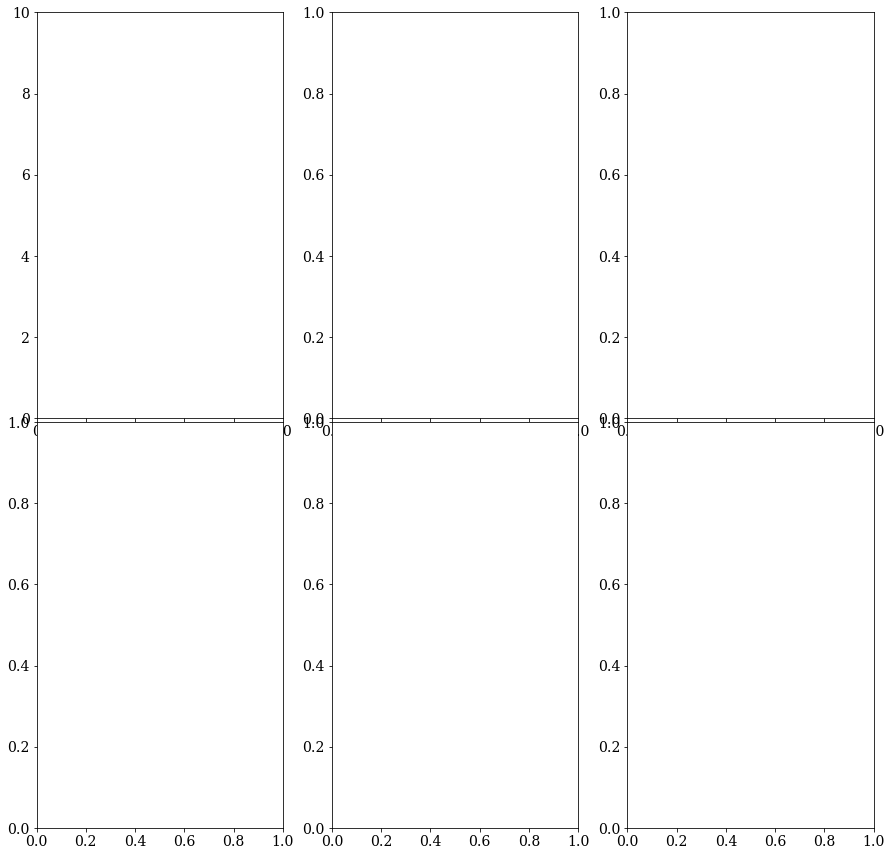

In [78]:
MLE=True
#generate (theta, nu) points
points = [(theta, nu) for theta, nu in 
          zip(np.random.randint(low=0,high=4,size=6), np.random.randint(low=0,high=4,size=6))]
print('points =', points, '\n')

results = sim_nm_lambdas_diff_theta_nu(points)
plot_all(results)

No handles with labels found to put in legend.


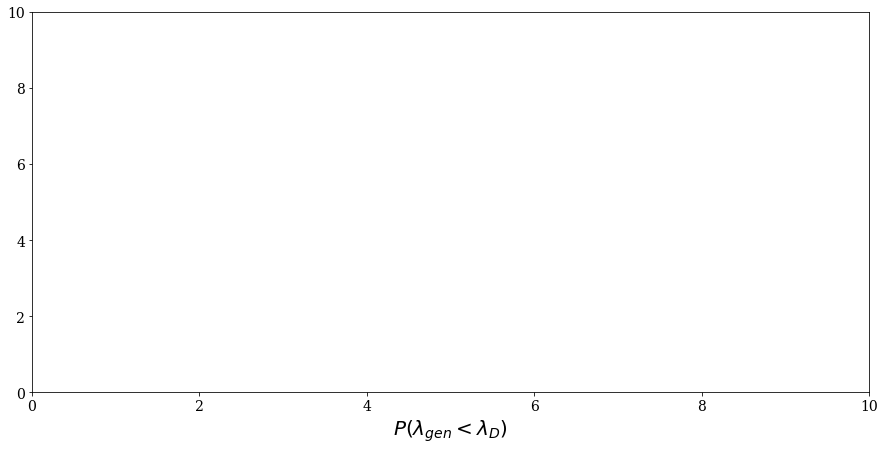

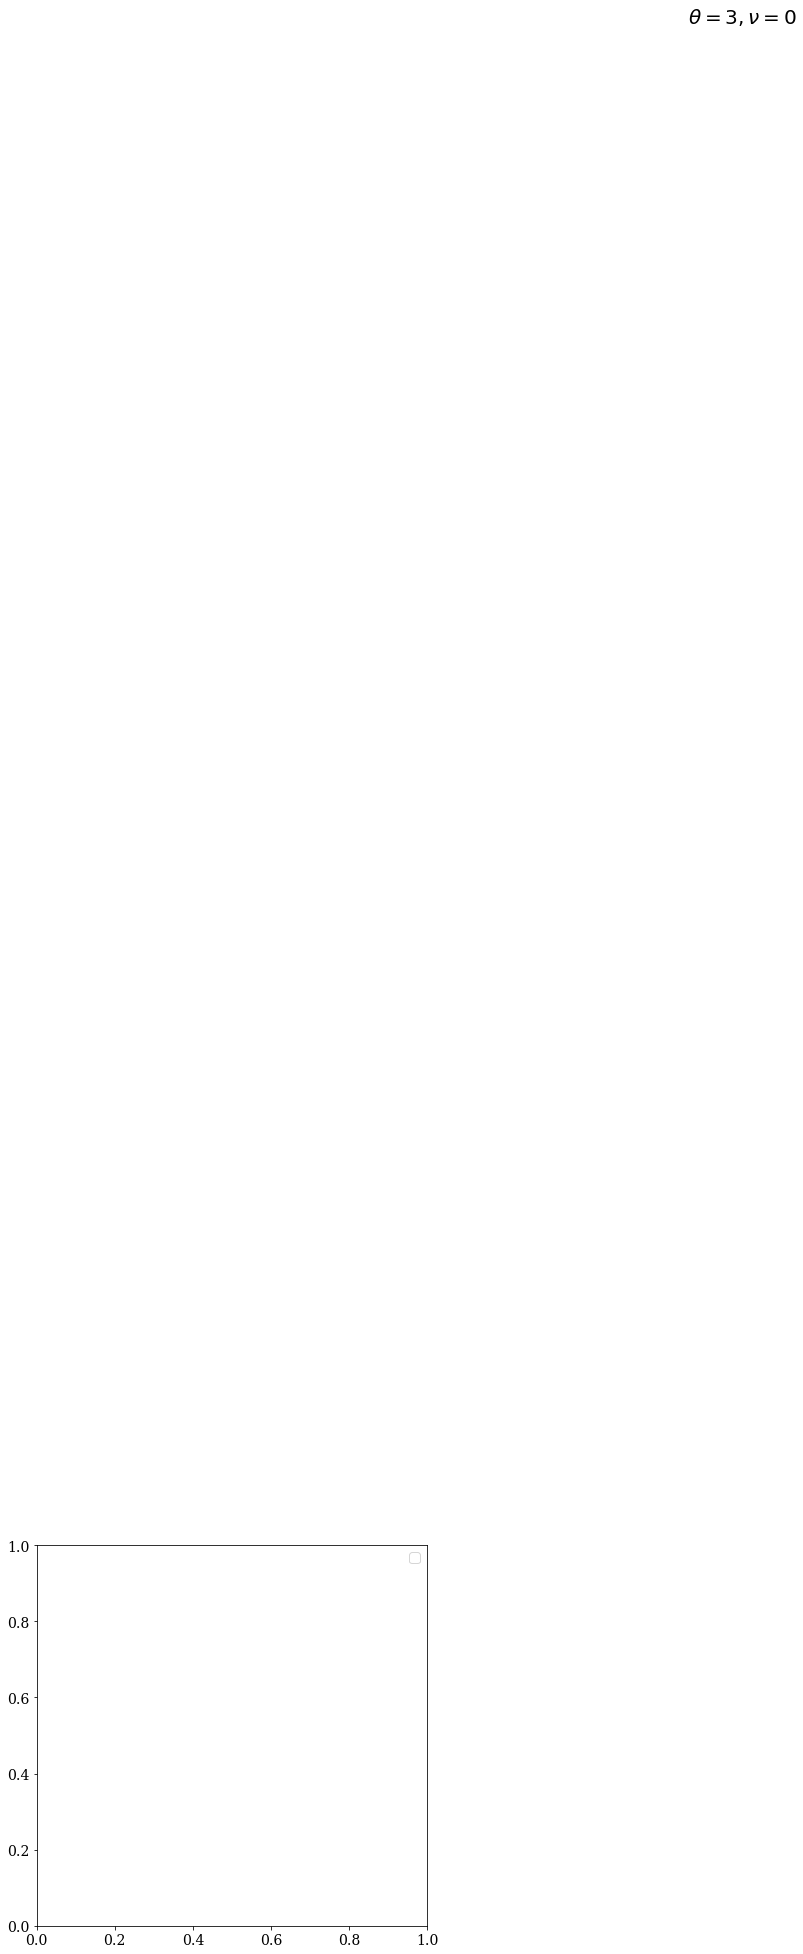

In [79]:
def plot_one(p_lambda_gen_lt_lambda_D, PHAT, theta, nu, ax):
    ftsize = 20
    xmin, xmax= 0, 10
    ymin, ymax = 0, 10
    x_range = (xmin, xmax)
    y_range = (ymin, ymax)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel(r'$P(\lambda_{gen}<\lambda_D)$',fontsize=ftsize)
    theta, nu= 3, 0
    n = st.poisson.rvs(theta+ nu, size=Bprime)
    m = st.poisson.rvs(nu, size=Bprime)
    lambda_gen = lambda_test(theta, n, m, MLE)
    lambda_D = lambda_test(theta, N, M, MLE)
    P_exact = (lambda_gen <= lambda_D).astype(np.int32)
    
    X = [theta, nu, N, M]
    with torch.no_grad():
        model.eval()

        X = torch.Tensor(X)
        phat = model(X)
        phat = phat.detach().flatten()
        # phat=phat.numpy()
        PHAT = phat.view(-1).numpy()
# plt.hist(PHAT, bins=50, label=r'$\hat{p}(\theta,\nu,N,M) \approx P(\lambda_{gen}<\lambda_D)$ ', alpha=0.35)
# plt.legend()
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    #positions for text
    xwid = (xmax-xmin)/12
    ywid = (ymax-ymin)/12
    xpos = xmin + xwid*2
    ypos = ymin + ywid*6
    ax.text(xpos, ypos,
    r'$ \theta = %d, \nu = %d$' % (theta, nu),
    fontsize=ftsize)
    
    ax.legend()
    
#order of features for the model:['theta', 'nu', 'N', 'M']


plot_one(P_exact, PHAT, theta, nu, ax)